In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn')
sns.set_palette("hls")

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False
mpl.rc('font', family='NanumBarunGothic') 

from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

from google.colab import drive
drive.mount('/content/drive')

!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Mounted at /content/drive
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,170 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling

# 최종 좌표클러스터

In [4]:
df = pd.read_csv("/content/drive/MyDrive/항로선박전처리.csv", encoding = "utf-8")
df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (15) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,YMD,MMSI,x,y,VE,SH_DRCN,IMO_IDNTF_NO,DRAFT,CRG_TYP,NVGTN_DIST,...,WAVE_AVE_CYCL,WAVE_MAX_HGHT,WAVE_AVE_HGHT,MAX_WDSP,AVE_WDSP,datetime,time,date,month,CII
0,01-Jan-2021 00:00:00,205517000,-33.593399,-11.850000,11.278000,104,9380738,0.0,0.0,125321.000,...,5.04549,7.10,0.708568,19.8878,3.00217,2021-01-01,00:00:00,2021-01-01,1,0.000002
1,23-Jan-2021 12:00:00,205517000,7.361150,67.215797,10.939100,0,9380738,0.0,0.0,121556.000,...,5.04549,7.10,0.708568,19.8878,3.00217,2021-01-23,12:00:00,2021-01-23,1,0.000002
2,23-Jan-2021 18:00:00,205517000,8.453450,67.288696,10.954500,1,9380738,0.0,0.0,121726.000,...,5.04549,7.10,0.708568,19.8878,3.00217,2021-01-23,18:00:00,2021-01-23,1,0.000002
3,24-Jan-2021 00:00:00,205517000,14.178800,67.649498,11.038500,5,9380738,0.0,0.0,122660.000,...,5.04549,7.10,0.708568,19.8878,3.00217,2021-01-24,00:00:00,2021-01-24,1,0.000002
4,24-Jan-2021 06:00:00,205517000,10.748500,67.440201,11.589500,3,9380738,0.0,0.0,128782.000,...,5.04549,7.10,0.708568,19.8878,3.00217,2021-01-24,06:00:00,2021-01-24,1,0.000002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776761,30-Jul-2021 12:00:00,538004968,-3.653230,-38.412601,0.043158,96,9539925,0.0,0.0,479.570,...,4.34338,7.93,0.685479,31.9696,3.94028,2021-07-30,12:00:00,2021-07-30,7,0.001468
1776762,30-Jul-2021 18:00:00,538004968,-3.653270,-38.412399,0.103410,0,9539925,0.0,0.0,1149.090,...,4.34338,7.93,0.685479,31.9696,3.94028,2021-07-30,18:00:00,2021-07-30,7,0.000612
1776763,31-Jul-2021 06:00:00,538004968,-3.709630,-38.483501,1.397210,165,9539925,0.0,0.0,15525.800,...,4.34338,7.93,0.685479,31.9696,3.94028,2021-07-31,06:00:00,2021-07-31,7,0.000045
1776764,31-Jul-2021 12:00:00,538004968,-3.708660,-38.483398,0.016546,165,9539925,0.0,0.0,183.862,...,4.34338,7.93,0.685479,31.9696,3.94028,2021-07-31,12:00:00,2021-07-31,7,0.003828


# 태평양 시각화

In [5]:
condition = (df.MMSI == 374245000)
ship_374245000= df[condition]
ship_374245000

,YMD,MMSI,x,y,VE,SH_DRCN,IMO_IDNTF_NO,DRAFT,CRG_TYP,NVGTN_DIST,...,WAVE_AVE_CYCL,WAVE_MAX_HGHT,WAVE_AVE_HGHT,MAX_WDSP,AVE_WDSP,datetime,time,date,month,CII
1158849,19-Jan-2021 18:00:00,374245000,-0.488659,159.671997,2.42929,5,9221683,0.0,0.0,26994.4,...,2.48256,3.79,0.568742,15.034,2.0358,2021-01-19,18:00:00,2021-01-19,1,0.000022
1158850,20-Jan-2021 00:00:00,374245000,-0.491229,159.542999,2.18207,311,9221683,0.0,0.0,24247.2,...,2.48256,3.79,0.568742,15.034,2.0358,2021-01-20,00:00:00,2021-01-20,1,0.000025
1158851,20-Jan-2021 06:00:00,374245000,-0.416880,159.311996,2.14319,10,9221683,0.0,0.0,23815.2,...,2.48256,3.79,0.568742,15.034,2.0358,2021-01-20,06:00:00,2021-01-20,1,0.000025
1158852,20-Jan-2021 12:00:00,374245000,-0.386283,159.110992,2.12695,102,9221683,0.0,0.0,23634.7,...,2.48256,3.79,0.568742,15.034,2.0358,2021-01-20,12:00:00,2021-01-20,1,0.000025
1158853,20-Jan-2021 18:00:00,374245000,-0.495726,159.759995,7.78814,346,9221683,0.0,0.0,86542.0,...,2.48256,3.79,0.568742,15.034,2.0358,2021-01-20,18:00:00,2021-01-20,1,0.000007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159674,30-Jul-2021 12:00:00,374245000,-1.618640,-101.523003,8.67459,0,9221683,0.0,0.0,96392.3,...,2.48256,3.79,0.568742,15.034,2.0358,2021-07-30,12:00:00,2021-07-30,7,0.000006
1159675,30-Jul-2021 18:00:00,374245000,-1.614670,-101.712997,2.06669,210,9221683,0.0,0.0,22965.1,...,2.48256,3.79,0.568742,15.034,2.0358,2021-07-30,18:00:00,2021-07-30,7,0.000026
1159676,31-Jul-2021 06:00:00,374245000,-2.242220,-101.522003,8.03172,141,9221683,0.0,0.0,89248.7,...,2.48256,3.79,0.568742,15.034,2.0358,2021-07-31,06:00:00,2021-07-31,7,0.000007
1159677,31-Jul-2021 12:00:00,374245000,-3.193300,-101.225998,10.19140,246,9221683,0.0,0.0,113247.0,...,2.48256,3.79,0.568742,15.034,2.0358,2021-07-31,12:00:00,2021-07-31,7,0.000005


In [6]:
condition = (df.SHIP_WDTH > 30) & (df.SHIP_WDTH < 40)
ship_374245000_same = df[condition]
ship_374245000_same

,YMD,MMSI,x,y,VE,SH_DRCN,IMO_IDNTF_NO,DRAFT,CRG_TYP,NVGTN_DIST,...,WAVE_AVE_CYCL,WAVE_MAX_HGHT,WAVE_AVE_HGHT,MAX_WDSP,AVE_WDSP,datetime,time,date,month,CII
9348,01-Jan-2021 00:00:00,209294000,21.029699,38.793598,12.929900,347,9334571,0.0,0.0,143678.000,...,8.58872,3.93,1.035720,14.7094,4.98075,2021-01-01,00:00:00,2021-01-01,1,0.000003
9349,01-Jan-2021 06:00:00,209294000,17.299601,40.187801,11.670300,341,9334571,0.0,0.0,129320.000,...,8.58872,3.93,1.035720,14.7094,4.98075,2021-01-01,06:00:00,2021-01-01,1,0.000004
9350,01-Jan-2021 12:00:00,209294000,18.582500,39.699799,13.652500,342,9334571,0.0,0.0,151707.000,...,8.58872,3.93,1.035720,14.7094,4.98075,2021-01-01,12:00:00,2021-01-01,1,0.000003
9351,01-Jan-2021 18:00:00,209294000,19.805500,39.229401,13.022100,339,9334571,0.0,0.0,144702.000,...,8.58872,3.93,1.035720,14.7094,4.98075,2021-01-01,18:00:00,2021-01-01,1,0.000003
9352,02-Jan-2021 00:00:00,209294000,22.500999,38.663799,0.380676,268,9334571,0.0,0.0,4230.090,...,8.58872,3.93,1.035720,14.7094,4.98075,2021-01-02,00:00:00,2021-01-02,1,0.000117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776761,30-Jul-2021 12:00:00,538004968,-3.653230,-38.412601,0.043158,96,9539925,0.0,0.0,479.570,...,4.34338,7.93,0.685479,31.9696,3.94028,2021-07-30,12:00:00,2021-07-30,7,0.001468
1776762,30-Jul-2021 18:00:00,538004968,-3.653270,-38.412399,0.103410,0,9539925,0.0,0.0,1149.090,...,4.34338,7.93,0.685479,31.9696,3.94028,2021-07-30,18:00:00,2021-07-30,7,0.000612
1776763,31-Jul-2021 06:00:00,538004968,-3.709630,-38.483501,1.397210,165,9539925,0.0,0.0,15525.800,...,4.34338,7.93,0.685479,31.9696,3.94028,2021-07-31,06:00:00,2021-07-31,7,0.000045
1776764,31-Jul-2021 12:00:00,538004968,-3.708660,-38.483398,0.016546,165,9539925,0.0,0.0,183.862,...,4.34338,7.93,0.685479,31.9696,3.94028,2021-07-31,12:00:00,2021-07-31,7,0.003828


In [7]:
condition = (ship_374245000_same.cluster == '태평양')
s = ship_374245000_same[condition]
s

,YMD,MMSI,x,y,VE,SH_DRCN,IMO_IDNTF_NO,DRAFT,CRG_TYP,NVGTN_DIST,...,WAVE_AVE_CYCL,WAVE_MAX_HGHT,WAVE_AVE_HGHT,MAX_WDSP,AVE_WDSP,datetime,time,date,month,CII
9437,23-Mar-2021 00:00:00,209294000,-5.93506,105.964996,0.112515,227,9334571,0.0,0.0,5001.09,...,8.58872,3.93,1.035720,14.7094,4.98075,2021-03-23,00:00:00,2021-03-23,3,0.000099
9438,24-Mar-2021 00:00:00,209294000,-5.92375,102.728996,11.030500,281,9334571,0.0,0.0,122572.00,...,8.58872,3.93,1.035720,14.7094,4.98075,2021-03-24,00:00:00,2021-03-24,3,0.000004
9439,24-Mar-2021 06:00:00,209294000,-6.04535,105.833000,1.725340,233,9334571,0.0,0.0,19172.00,...,8.58872,3.93,1.035720,14.7094,4.98075,2021-03-24,06:00:00,2021-03-24,3,0.000026
9589,17-Mar-2021 00:00:00,209294000,-2.36497,95.625603,13.169900,119,9334571,0.0,0.0,146345.00,...,8.58872,3.93,1.035720,14.7094,4.98075,2021-03-17,00:00:00,2021-03-17,3,0.000003
9591,17-Mar-2021 12:00:00,209294000,-1.14799,93.308800,12.935700,118,9334571,0.0,0.0,143742.00,...,8.58872,3.93,1.035720,14.7094,4.98075,2021-03-17,12:00:00,2021-03-17,3,0.000003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776677,09-Jul-2021 06:00:00,538004968,10.37630,-53.577301,9.882740,129,9539925,0.0,0.0,109817.00,...,4.34338,7.93,0.685479,31.9696,3.94028,2021-07-09,06:00:00,2021-07-09,7,0.000006
1776678,09-Jul-2021 12:00:00,538004968,9.69802,-52.694901,11.030800,0,9539925,0.0,0.0,122575.00,...,4.34338,7.93,0.685479,31.9696,3.94028,2021-07-09,12:00:00,2021-07-09,7,0.000006
1776679,09-Jul-2021 18:00:00,538004968,9.05478,-51.851101,10.531400,121,9539925,0.0,0.0,117025.00,...,4.34338,7.93,0.685479,31.9696,3.94028,2021-07-09,18:00:00,2021-07-09,7,0.000006
1776681,10-Jul-2021 06:00:00,538004968,7.88434,-50.324501,9.493810,132,9539925,0.0,0.0,105496.00,...,4.34338,7.93,0.685479,31.9696,3.94028,2021-07-10,06:00:00,2021-07-10,7,0.000007


In [8]:
s['MMSI'].value_counts()

368445000    832
338227000    831
374245000    824
368199000    824
372111000    821
            ... 
419001632     12
219488000      8
367703000      4
525018344      1
353757000      1
Name: MMSI, Length: 820, dtype: int64

In [9]:
condition = (df.MMSI == 368445000) | (df.MMSI == 338227000) | (df.MMSI == 374245000) | (df.MMSI == 368199000) | (df.MMSI == 372111000)
ship = df[condition]
ship

,YMD,MMSI,x,y,VE,SH_DRCN,IMO_IDNTF_NO,DRAFT,CRG_TYP,NVGTN_DIST,...,WAVE_AVE_CYCL,WAVE_MAX_HGHT,WAVE_AVE_HGHT,MAX_WDSP,AVE_WDSP,datetime,time,date,month,CII
917177,02-Jan-2021 00:00:00,338227000,7.90938,-83.669800,12.98330,299,9704776,0.0,0.0,144271.0,...,0.00000,0.00,0.000000,0.000,0.0000,2021-01-02,00:00:00,2021-01-02,1,0.000007
917178,02-Jan-2021 06:00:00,338227000,7.23498,-79.971497,14.69000,228,9704776,0.0,0.0,163236.0,...,0.00000,0.00,0.000000,0.000,0.0000,2021-01-02,06:00:00,2021-01-02,1,0.000006
917179,02-Jan-2021 12:00:00,338227000,6.96844,-81.235298,13.66340,269,9704776,0.0,0.0,151828.0,...,0.00000,0.00,0.000000,0.000,0.0000,2021-01-02,12:00:00,2021-01-02,1,0.000006
917180,02-Jan-2021 18:00:00,338227000,7.30940,-82.509697,13.47140,297,9704776,0.0,0.0,149695.0,...,0.00000,0.00,0.000000,0.000,0.0000,2021-01-02,18:00:00,2021-01-02,1,0.000006
917181,03-Jan-2021 00:00:00,338227000,10.36120,-88.522903,14.13390,304,9704776,0.0,0.0,157057.0,...,0.00000,0.00,0.000000,0.000,0.0000,2021-01-03,00:00:00,2021-01-03,1,0.000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159674,30-Jul-2021 12:00:00,374245000,-1.61864,-101.523003,8.67459,0,9221683,0.0,0.0,96392.3,...,2.48256,3.79,0.568742,15.034,2.0358,2021-07-30,12:00:00,2021-07-30,7,0.000006
1159675,30-Jul-2021 18:00:00,374245000,-1.61467,-101.712997,2.06669,210,9221683,0.0,0.0,22965.1,...,2.48256,3.79,0.568742,15.034,2.0358,2021-07-30,18:00:00,2021-07-30,7,0.000026
1159676,31-Jul-2021 06:00:00,374245000,-2.24222,-101.522003,8.03172,141,9221683,0.0,0.0,89248.7,...,2.48256,3.79,0.568742,15.034,2.0358,2021-07-31,06:00:00,2021-07-31,7,0.000007
1159677,31-Jul-2021 12:00:00,374245000,-3.19330,-101.225998,10.19140,246,9221683,0.0,0.0,113247.0,...,2.48256,3.79,0.568742,15.034,2.0358,2021-07-31,12:00:00,2021-07-31,7,0.000005


In [10]:
import folium
from folium import plugins

latitude, longitude = 2.814960, 9.831160
map_374245000 = folium.Map(location = [latitude, longitude], zoom_start=8)
map_374245000.add_child(plugins.HeatMap(zip(ship['x'],
                                      ship['y'],
                                      ship['CII']), radius=18))

### 📌 바다에 찍힌 점들 알아보기

In [11]:
condition = (df.MMSI == 368445000) | (df.MMSI == 338227000) | (df.MMSI == 374245000)
ship_Pacific4 = df[condition]
ship_Pacific4

,YMD,MMSI,x,y,VE,SH_DRCN,IMO_IDNTF_NO,DRAFT,CRG_TYP,NVGTN_DIST,...,WAVE_AVE_CYCL,WAVE_MAX_HGHT,WAVE_AVE_HGHT,MAX_WDSP,AVE_WDSP,datetime,time,date,month,CII
917177,02-Jan-2021 00:00:00,338227000,7.90938,-83.669800,12.98330,299,9704776,0.0,0.0,144271.0,...,0.00000,0.00,0.000000,0.000,0.0000,2021-01-02,00:00:00,2021-01-02,1,0.000007
917178,02-Jan-2021 06:00:00,338227000,7.23498,-79.971497,14.69000,228,9704776,0.0,0.0,163236.0,...,0.00000,0.00,0.000000,0.000,0.0000,2021-01-02,06:00:00,2021-01-02,1,0.000006
917179,02-Jan-2021 12:00:00,338227000,6.96844,-81.235298,13.66340,269,9704776,0.0,0.0,151828.0,...,0.00000,0.00,0.000000,0.000,0.0000,2021-01-02,12:00:00,2021-01-02,1,0.000006
917180,02-Jan-2021 18:00:00,338227000,7.30940,-82.509697,13.47140,297,9704776,0.0,0.0,149695.0,...,0.00000,0.00,0.000000,0.000,0.0000,2021-01-02,18:00:00,2021-01-02,1,0.000006
917181,03-Jan-2021 00:00:00,338227000,10.36120,-88.522903,14.13390,304,9704776,0.0,0.0,157057.0,...,0.00000,0.00,0.000000,0.000,0.0000,2021-01-03,00:00:00,2021-01-03,1,0.000006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159674,30-Jul-2021 12:00:00,374245000,-1.61864,-101.523003,8.67459,0,9221683,0.0,0.0,96392.3,...,2.48256,3.79,0.568742,15.034,2.0358,2021-07-30,12:00:00,2021-07-30,7,0.000006
1159675,30-Jul-2021 18:00:00,374245000,-1.61467,-101.712997,2.06669,210,9221683,0.0,0.0,22965.1,...,2.48256,3.79,0.568742,15.034,2.0358,2021-07-30,18:00:00,2021-07-30,7,0.000026
1159676,31-Jul-2021 06:00:00,374245000,-2.24222,-101.522003,8.03172,141,9221683,0.0,0.0,89248.7,...,2.48256,3.79,0.568742,15.034,2.0358,2021-07-31,06:00:00,2021-07-31,7,0.000007
1159677,31-Jul-2021 12:00:00,374245000,-3.19330,-101.225998,10.19140,246,9221683,0.0,0.0,113247.0,...,2.48256,3.79,0.568742,15.034,2.0358,2021-07-31,12:00:00,2021-07-31,7,0.000005


In [12]:
condition = ((ship_Pacific4.x <= 5.4) & (ship_Pacific4.x >= -16)) & (((ship_Pacific4.y >= -123) & (ship_Pacific4.y <= -89)) | ((ship_Pacific4.y <= -178) & (ship_Pacific4.y >= 153)))
ship_Pacific4_range1 = ship_Pacific4[condition]
ship_Pacific4_range1

,YMD,MMSI,x,y,VE,SH_DRCN,IMO_IDNTF_NO,DRAFT,CRG_TYP,NVGTN_DIST,...,WAVE_AVE_CYCL,WAVE_MAX_HGHT,WAVE_AVE_HGHT,MAX_WDSP,AVE_WDSP,datetime,time,date,month,CII
1159124,14-Mar-2021 00:00:00,374245000,-6.01246,-120.648003,11.99270,74,9221683,0.0,0.0,133264.0,...,2.48256,3.79,0.568742,15.034,2.0358,2021-03-14,00:00:00,2021-03-14,3,0.000005
1159126,14-Mar-2021 12:00:00,374245000,-6.71455,-122.958000,11.81650,73,9221683,0.0,0.0,131305.0,...,2.48256,3.79,0.568742,15.034,2.0358,2021-03-14,12:00:00,2021-03-14,3,0.000005
1159127,14-Mar-2021 18:00:00,374245000,-6.36118,-121.794998,12.11700,72,9221683,0.0,0.0,134645.0,...,2.48256,3.79,0.568742,15.034,2.0358,2021-03-14,18:00:00,2021-03-14,3,0.000004
1159128,15-Mar-2021 00:00:00,374245000,-4.61310,-116.150002,11.64540,73,9221683,0.0,0.0,129404.0,...,2.48256,3.79,0.568742,15.034,2.0358,2021-03-15,00:00:00,2021-03-15,3,0.000005
1159129,15-Mar-2021 06:00:00,374245000,-5.65648,-119.502998,11.94150,74,9221683,0.0,0.0,132694.0,...,2.48256,3.79,0.568742,15.034,2.0358,2021-03-15,06:00:00,2021-03-15,3,0.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159674,30-Jul-2021 12:00:00,374245000,-1.61864,-101.523003,8.67459,0,9221683,0.0,0.0,96392.3,...,2.48256,3.79,0.568742,15.034,2.0358,2021-07-30,12:00:00,2021-07-30,7,0.000006
1159675,30-Jul-2021 18:00:00,374245000,-1.61467,-101.712997,2.06669,210,9221683,0.0,0.0,22965.1,...,2.48256,3.79,0.568742,15.034,2.0358,2021-07-30,18:00:00,2021-07-30,7,0.000026
1159676,31-Jul-2021 06:00:00,374245000,-2.24222,-101.522003,8.03172,141,9221683,0.0,0.0,89248.7,...,2.48256,3.79,0.568742,15.034,2.0358,2021-07-31,06:00:00,2021-07-31,7,0.000007
1159677,31-Jul-2021 12:00:00,374245000,-3.19330,-101.225998,10.19140,246,9221683,0.0,0.0,113247.0,...,2.48256,3.79,0.568742,15.034,2.0358,2021-07-31,12:00:00,2021-07-31,7,0.000005


In [13]:
import folium
from folium import plugins

latitude, longitude = 2.814960, 9.831160
map_Pacific4_range1 = folium.Map(location = [latitude, longitude], zoom_start=8)
map_Pacific4_range1.add_child(plugins.HeatMap(zip(ship_Pacific4_range1['x'],
                                      ship_Pacific4_range1['y'],
                                      ship_Pacific4_range1['CII']), radius=18))

In [14]:
condition = (ship_Pacific4.y > 150) 
ship_Pacific4_range2 = ship_Pacific4[condition]
ship_Pacific4_range2

,YMD,MMSI,x,y,VE,SH_DRCN,IMO_IDNTF_NO,DRAFT,CRG_TYP,NVGTN_DIST,...,WAVE_AVE_CYCL,WAVE_MAX_HGHT,WAVE_AVE_HGHT,MAX_WDSP,AVE_WDSP,datetime,time,date,month,CII
1158849,19-Jan-2021 18:00:00,374245000,-0.488659,159.671997,2.42929,5,9221683,0.0,0.0,26994.4,...,2.48256,3.79,0.568742,15.034,2.0358,2021-01-19,18:00:00,2021-01-19,1,0.000022
1158850,20-Jan-2021 00:00:00,374245000,-0.491229,159.542999,2.18207,311,9221683,0.0,0.0,24247.2,...,2.48256,3.79,0.568742,15.034,2.0358,2021-01-20,00:00:00,2021-01-20,1,0.000025
1158851,20-Jan-2021 06:00:00,374245000,-0.416880,159.311996,2.14319,10,9221683,0.0,0.0,23815.2,...,2.48256,3.79,0.568742,15.034,2.0358,2021-01-20,06:00:00,2021-01-20,1,0.000025
1158852,20-Jan-2021 12:00:00,374245000,-0.386283,159.110992,2.12695,102,9221683,0.0,0.0,23634.7,...,2.48256,3.79,0.568742,15.034,2.0358,2021-01-20,12:00:00,2021-01-20,1,0.000025
1158853,20-Jan-2021 18:00:00,374245000,-0.495726,159.759995,7.78814,346,9221683,0.0,0.0,86542.0,...,2.48256,3.79,0.568742,15.034,2.0358,2021-01-20,18:00:00,2021-01-20,1,0.000007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159059,25-Feb-2021 12:00:00,374245000,2.497170,177.048996,11.07870,85,9221683,0.0,0.0,123107.0,...,2.48256,3.79,0.568742,15.034,2.0358,2021-02-25,12:00:00,2021-02-25,2,0.000005
1159060,25-Feb-2021 18:00:00,374245000,2.591990,177.141006,2.99133,355,9221683,0.0,0.0,33239.7,...,2.48256,3.79,0.568742,15.034,2.0358,2021-02-25,18:00:00,2021-02-25,2,0.000018
1159062,26-Feb-2021 06:00:00,374245000,2.599930,177.281006,3.83227,99,9221683,0.0,0.0,42584.3,...,2.48256,3.79,0.568742,15.034,2.0358,2021-02-26,06:00:00,2021-02-26,2,0.000014
1159063,26-Feb-2021 12:00:00,374245000,2.357040,178.365997,11.12850,0,9221683,0.0,0.0,123660.0,...,2.48256,3.79,0.568742,15.034,2.0358,2021-02-26,12:00:00,2021-02-26,2,0.000005


In [15]:
import folium
from folium import plugins

latitude, longitude = 2.814960, 9.831160
map_Pacific4_range2 = folium.Map(location = [latitude, longitude], zoom_start=8)
map_Pacific4_range2.add_child(plugins.HeatMap(zip(ship_Pacific4_range2['x'],
                                      ship_Pacific4_range2['y'],
                                      ship_Pacific4_range2['CII']), radius=18))

# 필리핀해 시각화

In [16]:
condition = (df.MMSI == 477147100)
ship_477147100= df[condition]
ship_477147100

,YMD,MMSI,x,y,VE,SH_DRCN,IMO_IDNTF_NO,DRAFT,CRG_TYP,NVGTN_DIST,...,WAVE_AVE_CYCL,WAVE_MAX_HGHT,WAVE_AVE_HGHT,MAX_WDSP,AVE_WDSP,datetime,time,date,month,CII
1490033,21-Jan-2021 12:00:00,477147100,30.478300,122.280998,0.005434,246,9796901,0.0,0.0,60.3788,...,5.72692,4.84,0.912131,18.3452,5.13899,2021-01-21,12:00:00,2021-01-21,1,0.012055
1490034,21-Jan-2021 18:00:00,477147100,30.477200,122.279999,0.028240,246,9796901,0.0,0.0,313.8000,...,5.72692,4.84,0.912131,18.3452,5.13899,2021-01-21,18:00:00,2021-01-21,1,0.002319
1490035,22-Jan-2021 00:00:00,477147100,30.478300,122.280998,0.001555,246,9796901,0.0,0.0,17.2782,...,5.72692,4.84,0.912131,18.3452,5.13899,2021-01-22,00:00:00,2021-01-22,1,0.042125
1490036,22-Jan-2021 06:00:00,477147100,30.478399,122.280998,0.046568,246,9796901,0.0,0.0,517.4690,...,5.72692,4.84,0.912131,18.3452,5.13899,2021-01-22,06:00:00,2021-01-22,1,0.001407
1490037,22-Jan-2021 12:00:00,477147100,30.476700,122.279999,0.021405,0,9796901,0.0,0.0,237.8510,...,5.72692,4.84,0.912131,18.3452,5.13899,2021-01-22,12:00:00,2021-01-22,1,0.003060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490704,26-Jul-2021 06:00:00,477147100,3.923020,105.682999,12.897200,0,9796901,0.0,0.0,143314.0000,...,5.72692,4.84,0.912131,18.3452,5.13899,2021-07-26,06:00:00,2021-07-26,7,0.000005
1490705,26-Jul-2021 18:00:00,477147100,5.757420,107.472000,12.798300,0,9796901,0.0,0.0,284430.0000,...,5.72692,4.84,0.912131,18.3452,5.13899,2021-07-26,18:00:00,2021-07-26,7,0.000003
1490706,27-Jul-2021 00:00:00,477147100,10.361800,111.717003,12.305100,0,9796901,0.0,0.0,410205.0000,...,5.72692,4.84,0.912131,18.3452,5.13899,2021-07-27,00:00:00,2021-07-27,7,0.000002
1490707,27-Jul-2021 06:00:00,477147100,7.591250,109.250999,12.598400,0,9796901,0.0,0.0,139994.0000,...,5.72692,4.84,0.912131,18.3452,5.13899,2021-07-27,06:00:00,2021-07-27,7,0.000005


In [17]:
import folium
from folium import plugins

latitude, longitude = 2.814960, 9.831160
map_477147100 = folium.Map(location = [latitude, longitude], zoom_start=8)
map_477147100.add_child(plugins.HeatMap(zip(ship_477147100['x'],
                                      ship_477147100['y'],
                                      ship_477147100['CII']), radius=18))

In [18]:
ship_477147100.sort_values('CII', ascending = False)

,YMD,MMSI,x,y,VE,SH_DRCN,IMO_IDNTF_NO,DRAFT,CRG_TYP,NVGTN_DIST,...,WAVE_AVE_CYCL,WAVE_MAX_HGHT,WAVE_AVE_HGHT,MAX_WDSP,AVE_WDSP,datetime,time,date,month,CII
1490149,07-Feb-2021 00:00:00,477147100,22.832701,113.564003,0.001213,354,9796901,0.0,0.0,13.4808,...,5.72692,4.84,0.912131,18.3452,5.13899,2021-02-07,00:00:00,2021-02-07,2,0.053991
1490102,19-Jan-2021 18:00:00,477147100,30.478300,122.280998,0.001384,246,9796901,0.0,0.0,15.3795,...,5.72692,4.84,0.912131,18.3452,5.13899,2021-01-19,18:00:00,2021-01-19,1,0.047326
1490346,18-Apr-2021 12:00:00,477147100,23.063601,113.496002,0.001401,142,9796901,0.0,0.0,15.5694,...,5.72692,4.84,0.912131,18.3452,5.13899,2021-04-18,12:00:00,2021-04-18,4,0.046749
1490218,27-Feb-2021 12:00:00,477147100,35.431900,129.371994,0.001435,359,9796901,0.0,0.0,15.9491,...,5.72692,4.84,0.912131,18.3452,5.13899,2021-02-27,12:00:00,2021-02-27,2,0.045636
1490215,26-Feb-2021 18:00:00,477147100,35.431999,129.371994,0.000718,359,9796901,0.0,0.0,15.9491,...,5.72692,4.84,0.912131,18.3452,5.13899,2021-02-26,18:00:00,2021-02-26,2,0.045636
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490129,29-Jan-2021 18:00:00,477147100,33.890202,127.430000,12.048500,0,9796901,0.0,0.0,401651.0000,...,5.72692,4.84,0.912131,18.3452,5.13899,2021-01-29,18:00:00,2021-01-29,1,0.000002
1490421,12-May-2021 00:00:00,477147100,4.677270,106.303001,12.180400,0,9796901,0.0,0.0,406047.0000,...,5.72692,4.84,0.912131,18.3452,5.13899,2021-05-12,00:00:00,2021-05-12,5,0.000002
1490706,27-Jul-2021 00:00:00,477147100,10.361800,111.717003,12.305100,0,9796901,0.0,0.0,410205.0000,...,5.72692,4.84,0.912131,18.3452,5.13899,2021-07-27,00:00:00,2021-07-27,7,0.000002
1490252,13-Mar-2021 00:00:00,477147100,27.858700,123.310997,12.381600,0,9796901,0.0,0.0,412755.0000,...,5.72692,4.84,0.912131,18.3452,5.13899,2021-03-13,00:00:00,2021-03-13,3,0.000002


In [19]:
condition = (df.SHIP_WDTH > 30) & (df.SHIP_WDTH < 40)
ship_477147100 = df[condition]
ship_477147100

,YMD,MMSI,x,y,VE,SH_DRCN,IMO_IDNTF_NO,DRAFT,CRG_TYP,NVGTN_DIST,...,WAVE_AVE_CYCL,WAVE_MAX_HGHT,WAVE_AVE_HGHT,MAX_WDSP,AVE_WDSP,datetime,time,date,month,CII
9348,01-Jan-2021 00:00:00,209294000,21.029699,38.793598,12.929900,347,9334571,0.0,0.0,143678.000,...,8.58872,3.93,1.035720,14.7094,4.98075,2021-01-01,00:00:00,2021-01-01,1,0.000003
9349,01-Jan-2021 06:00:00,209294000,17.299601,40.187801,11.670300,341,9334571,0.0,0.0,129320.000,...,8.58872,3.93,1.035720,14.7094,4.98075,2021-01-01,06:00:00,2021-01-01,1,0.000004
9350,01-Jan-2021 12:00:00,209294000,18.582500,39.699799,13.652500,342,9334571,0.0,0.0,151707.000,...,8.58872,3.93,1.035720,14.7094,4.98075,2021-01-01,12:00:00,2021-01-01,1,0.000003
9351,01-Jan-2021 18:00:00,209294000,19.805500,39.229401,13.022100,339,9334571,0.0,0.0,144702.000,...,8.58872,3.93,1.035720,14.7094,4.98075,2021-01-01,18:00:00,2021-01-01,1,0.000003
9352,02-Jan-2021 00:00:00,209294000,22.500999,38.663799,0.380676,268,9334571,0.0,0.0,4230.090,...,8.58872,3.93,1.035720,14.7094,4.98075,2021-01-02,00:00:00,2021-01-02,1,0.000117
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776761,30-Jul-2021 12:00:00,538004968,-3.653230,-38.412601,0.043158,96,9539925,0.0,0.0,479.570,...,4.34338,7.93,0.685479,31.9696,3.94028,2021-07-30,12:00:00,2021-07-30,7,0.001468
1776762,30-Jul-2021 18:00:00,538004968,-3.653270,-38.412399,0.103410,0,9539925,0.0,0.0,1149.090,...,4.34338,7.93,0.685479,31.9696,3.94028,2021-07-30,18:00:00,2021-07-30,7,0.000612
1776763,31-Jul-2021 06:00:00,538004968,-3.709630,-38.483501,1.397210,165,9539925,0.0,0.0,15525.800,...,4.34338,7.93,0.685479,31.9696,3.94028,2021-07-31,06:00:00,2021-07-31,7,0.000045
1776764,31-Jul-2021 12:00:00,538004968,-3.708660,-38.483398,0.016546,165,9539925,0.0,0.0,183.862,...,4.34338,7.93,0.685479,31.9696,3.94028,2021-07-31,12:00:00,2021-07-31,7,0.003828


In [20]:
ship_477147100['MMSI'].value_counts()

372382000    841
368445000    832
311001007    831
338227000    831
374245000    830
            ... 
422231200     25
525007035     24
366273000     17
367703000      4
525018344      1
Name: MMSI, Length: 1039, dtype: int64

In [21]:
condition = (ship_477147100.cluster == '필리핀해')
s = ship_477147100[condition]
s

,YMD,MMSI,x,y,VE,SH_DRCN,IMO_IDNTF_NO,DRAFT,CRG_TYP,NVGTN_DIST,...,WAVE_AVE_CYCL,WAVE_MAX_HGHT,WAVE_AVE_HGHT,MAX_WDSP,AVE_WDSP,datetime,time,date,month,CII
9984,22-Jul-2021 00:00:00,209294000,19.904400,120.988998,12.55210,58,9334571,0.0,0.0,2650100.0,...,8.58872,3.93,1.035720,14.7094,4.98075,2021-07-22,00:00:00,2021-07-22,7,1.867988e-07
26087,07-Feb-2021 00:00:00,210132000,19.854300,119.445000,10.28890,31,9295036,0.0,0.0,2743930.0,...,3.22574,3.68,0.491399,15.6797,3.37212,2021-02-07,00:00:00,2021-02-07,2,6.404978e-08
29336,14-Feb-2021 00:00:00,210979000,15.609500,118.166000,11.69630,57,9277773,0.0,0.0,1559640.0,...,8.74102,3.95,1.066940,15.5289,5.24094,2021-02-14,00:00:00,2021-02-14,2,3.136390e-06
29337,17-Feb-2021 00:00:00,210979000,19.309099,120.466003,10.86910,41,9277773,0.0,0.0,362333.0,...,8.74102,3.95,1.066940,15.5289,5.24094,2021-02-17,00:00:00,2021-02-17,2,1.350039e-05
29338,17-Feb-2021 06:00:00,210979000,16.319599,119.140999,11.85240,20,9277773,0.0,0.0,131704.0,...,8.74102,3.95,1.066940,15.5289,5.24094,2021-02-17,06:00:00,2021-02-17,2,3.714115e-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1755455,21-Jul-2021 06:00:00,538004214,18.998100,123.947998,9.94164,92,9334557,0.0,0.0,110472.0,...,1.17958,4.79,0.312400,15.1125,1.44877,2021-07-21,06:00:00,2021-07-21,7,9.306391e-06
1755456,21-Jul-2021 18:00:00,538004214,18.996300,126.320000,11.22070,85,9334557,0.0,0.0,249370.0,...,1.17958,4.79,0.312400,15.1125,1.44877,2021-07-21,18:00:00,2021-07-21,7,4.122772e-06
1755693,17-Feb-2021 00:00:00,538004215,20.234501,117.688004,10.51470,75,9334569,0.0,0.0,2336790.0,...,10.20010,8.54,1.438680,20.5563,5.18217,2021-02-17,00:00:00,2021-02-17,2,4.147017e-07
1768659,29-Mar-2021 00:00:00,538004640,20.347300,120.661003,13.71950,221,9456939,0.0,0.0,609805.0,...,2.35934,3.79,0.336208,18.8996,2.19178,2021-03-29,00:00:00,2021-03-29,3,2.688411e-03


In [22]:
s['MMSI'].value_counts()

477147100    127
414491000     99
477854300     90
477043900     88
477100200     71
            ... 
354237000      1
477542400      1
354800000      1
477110600      1
209294000      1
Name: MMSI, Length: 249, dtype: int64

In [23]:
condition = (df.MMSI == 477147100) | (df.MMSI == 414491000) | (df.MMSI == 477854300)
ship = df[condition]
ship

,YMD,MMSI,x,y,VE,SH_DRCN,IMO_IDNTF_NO,DRAFT,CRG_TYP,NVGTN_DIST,...,WAVE_AVE_CYCL,WAVE_MAX_HGHT,WAVE_AVE_HGHT,MAX_WDSP,AVE_WDSP,datetime,time,date,month,CII
1270654,15-Jan-2021 00:00:00,414491000,36.039799,121.802002,9.607310,300,9406350,0.0,0.0,747297.00,...,5.27977,3.39,0.751219,14.8777,4.75598,2021-01-15,00:00:00,2021-01-15,1,5.078962e-07
1270655,15-Jan-2021 06:00:00,414491000,29.874100,122.193001,0.488926,225,9406350,0.0,0.0,4298.58,...,5.27977,3.39,0.751219,14.8777,4.75598,2021-01-15,06:00:00,2021-01-15,1,8.829644e-05
1270656,17-Jan-2021 00:00:00,414491000,40.108898,121.473999,12.723900,39,9406350,0.0,0.0,141388.00,...,5.27977,3.39,0.751219,14.8777,4.75598,2021-01-17,00:00:00,2021-01-17,1,2.684452e-06
1270657,17-Jan-2021 18:00:00,414491000,38.949402,120.902000,10.650200,358,9406350,0.0,0.0,355036.00,...,5.27977,3.39,0.751219,14.8777,4.75598,2021-01-17,18:00:00,2021-01-17,1,1.069045e-06
1270658,18-Jan-2021 00:00:00,414491000,40.188000,121.580002,0.099293,84,9406350,0.0,0.0,1103.35,...,5.27977,3.39,0.751219,14.8777,4.75598,2021-01-18,00:00:00,2021-01-18,1,3.439972e-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1490704,26-Jul-2021 06:00:00,477147100,3.923020,105.682999,12.897200,0,9796901,0.0,0.0,143314.00,...,5.72692,4.84,0.912131,18.3452,5.13899,2021-07-26,06:00:00,2021-07-26,7,5.078689e-06
1490705,26-Jul-2021 18:00:00,477147100,5.757420,107.472000,12.798300,0,9796901,0.0,0.0,284430.00,...,5.72692,4.84,0.912131,18.3452,5.13899,2021-07-26,18:00:00,2021-07-26,7,2.558968e-06
1490706,27-Jul-2021 00:00:00,477147100,10.361800,111.717003,12.305100,0,9796901,0.0,0.0,410205.00,...,5.72692,4.84,0.912131,18.3452,5.13899,2021-07-27,00:00:00,2021-07-27,7,1.774350e-06
1490707,27-Jul-2021 06:00:00,477147100,7.591250,109.250999,12.598400,0,9796901,0.0,0.0,139994.00,...,5.72692,4.84,0.912131,18.3452,5.13899,2021-07-27,06:00:00,2021-07-27,7,5.199132e-06


In [24]:
import folium
from folium import plugins

latitude, longitude = 2.814960, 9.831160
map = folium.Map(location = [latitude, longitude], zoom_start=8)
map.add_child(plugins.HeatMap(zip(ship['x'],
                                      ship['y'],
                                      ship['CII']), radius=18))

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [26]:
temp_data = ship_477147100.drop

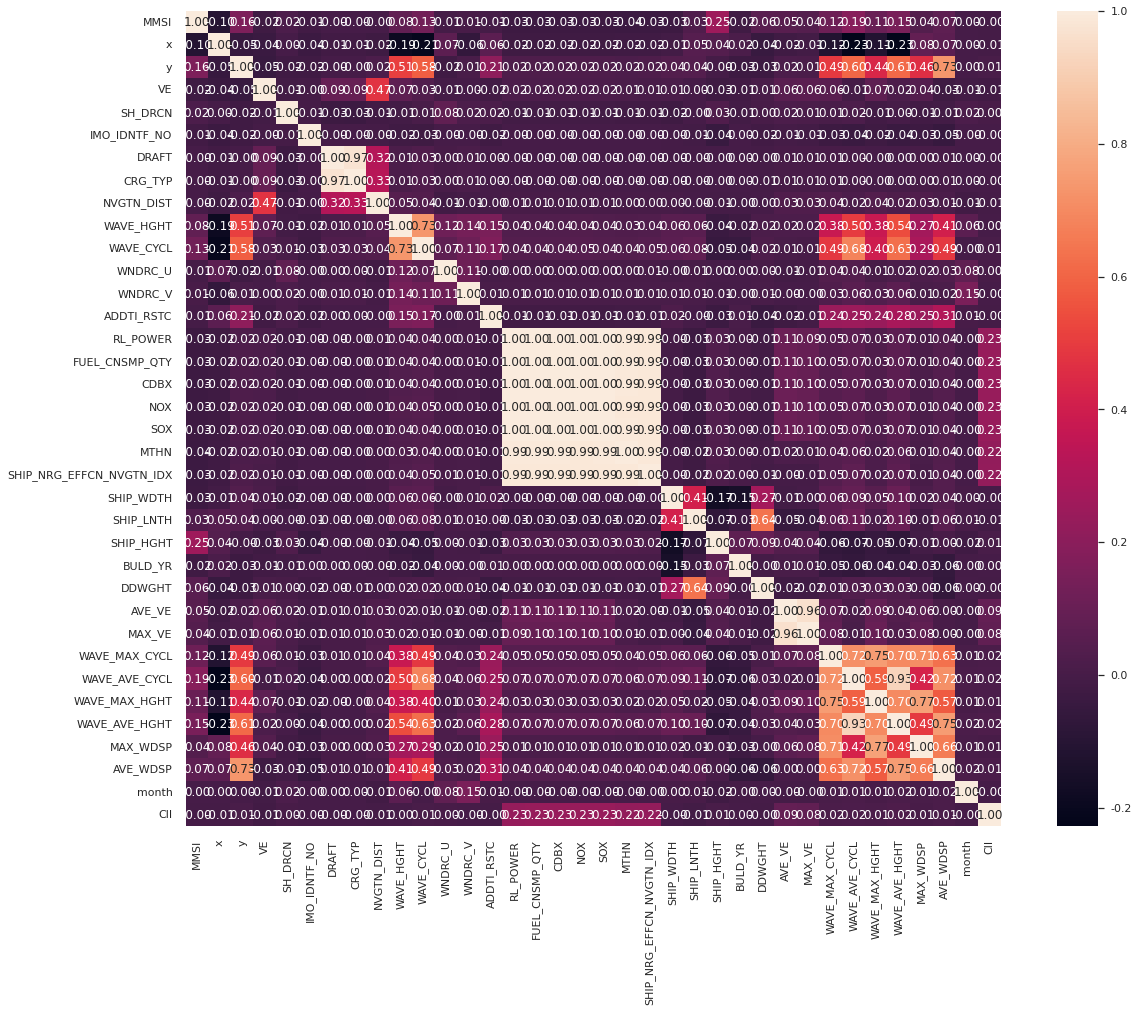

In [27]:
plt.figure(figsize = (20,15))
sns.heatmap(ship_477147100.corr(), annot=True, fmt='.2f', square=True)
plt.show()